# Credit Risk Analysis

# *Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

### Importing Dataset from Text File

In [2]:
Credit_DS = pd.read_csv(r"D:\Desktop\Nidhi's Desktop\Imarticus Project\Credit_Risk_Analysis.txt", delimiter="\t", header=0, engine='python')
print(Credit_DS)

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599     5000.0       5000.0      4975.000000   
1        1077430    1314167     2500.0       2500.0      2500.000000   
2        1077175    1313524     2400.0       2400.0      2400.000000   
3        1076863    1277178    10000.0      10000.0     10000.000000   
4        1075358    1311748     3000.0       3000.0      3000.000000   
5        1075269    1311441     5000.0       5000.0      5000.000000   
6        1069639    1304742     7000.0       7000.0      7000.000000   
7        1072053    1288686     3000.0       3000.0      3000.000000   
8        1071795    1306957     5600.0       5600.0      5600.000000   
9        1071570    1306721     5375.0       5375.0      5350.000000   
10       1070078    1305201     6500.0       6500.0      6500.000000   
11       1069908    1305008    12000.0      12000.0     12000.000000   
12       1064687    1298717     9000.0       9000.0      9000.00

In [3]:
Credit_DS.shape

(855969, 73)

In [4]:
Credit_DS.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... il_util open_rv_12m open_rv_24m  \
0     10.65       162.87     B        B2  ...     NaN         NaN         NaN   
1     15.27        59.83     C        C4  ...     NaN         NaN         NaN   
2     15.96        84.33     C        C5  ...     NaN         NaN         NaN   
3     13.49       339.31     C        C1  ...     NaN         NaN         NaN   
4     12.69        67.79     B        B5  ...     NaN         NaN         NaN   

   max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0         NaN      NaN              NaN    NaN         NaN          NaN   
1         NaN      NaN              NaN    NaN         NaN          NaN   
2         NaN      NaN              NaN    NaN         NaN          NaN   
3         NaN      NaN              NaN    NaN         NaN          NaN   
4         NaN      NaN              NaN    NaN         NaN          NaN   

  default_ind  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 73 columns]

In [5]:
print(Credit_DS.dtypes)

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

In [6]:
Credit_DS.describe()

id     member_id      loan_amnt    funded_amnt  \
count  8.559690e+05  8.559690e+05  855969.000000  855969.000000   
mean   3.224073e+07  3.476269e+07   14745.571335   14732.378305   
std    2.271969e+07  2.399418e+07    8425.340005    8419.471653   
min    5.473400e+04  7.069900e+04     500.000000     500.000000   
25%    9.067986e+06  1.079273e+07    8000.000000    8000.000000   
50%    3.431355e+07  3.697532e+07   13000.000000   13000.000000   
75%    5.446311e+07  5.803559e+07   20000.000000   20000.000000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    855969.000000  855969.000000  855969.000000  8.559690e+05   
mean      14700.061226      13.192320     436.238072  7.507119e+04   
std        8425.805478       4.368365     243.726876  6.426447e+04   
min           0.000000       5.320000      15.690000  0.000000e+00   
25%        8000.000000       9.990000     260.550000  4.500000e+04   
50%       13000.000000      12.990000     382.550000  6.500000e+04   
75%       20000.000000      15.990000     571.560000  9.000000e+04   
max       35000.000000      28.990000    1445.460000  9.500000e+06   

                 dti    delinq_2yrs  ...       il_util   open_rv_12m  \
count  855969.000000  855969.000000  ...  11609.000000  13288.000000   
mean       18.122165       0.311621  ...     71.486993      1.354305   
std        17.423629       0.857189  ...     23.015293      1.483710   
min         0.000000       0.000000  ...      0.000000      0.000000   
25%        11.880000       0.000000  ...     58.500000      0.000000   
50%        17.610000       0.000000  ...     75.000000      1.000000   
75%        23.900000       0.000000  ...     87.500000      2.000000   
max      9999.000000      39.000000  ...    223.300000     22.000000   

        open_rv_24m    max_bal_bc      all_util  total_rev_hi_lim  \
count  13288.000000  13288.000000  13288.000000      7.886560e+05   
mean       2.945515   5840.443332     61.024526      3.216357e+04   
std        2.595313   5108.500262     20.018117      3.769964e+04   
min        0.000000      0.000000      0.000000      0.000000e+00   
25%        1.000000   2405.000000     47.900000      1.400000e+04   
50%        2.000000   4485.500000     62.100000      2.380000e+04   
75%        4.000000   7701.250000     75.300000      3.990000e+04   
max       43.000000  83047.000000    151.400000      9.999999e+06   

             inq_fi   total_cu_tl  inq_last_12m    default_ind  
count  13288.000000  13288.000000  13288.000000  855969.000000  
mean       0.947772      1.524232      1.841963       0.054286  
std        1.441667      2.697601      2.975049       0.226581  
min        0.000000      0.000000     -4.000000       0.000000  
25%        0.000000      0.000000      0.000000       0.000000  
50%        0.000000      0.000000      2.000000       0.000000  
75%        1.000000      2.000000      3.000000       0.000000  
max       15.000000     33.000000     32.000000       1.000000  

[8 rows x 52 columns]


# Creating A Copy of DataFrame

In [8]:
Credit_DS_Backup = Credit_DS.copy()

In [9]:
Credit_DS_Backup.shape

(855969, 73)

In [10]:
print(Credit_DS_Backup)

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599     5000.0       5000.0      4975.000000   
1        1077430    1314167     2500.0       2500.0      2500.000000   
2        1077175    1313524     2400.0       2400.0      2400.000000   
3        1076863    1277178    10000.0      10000.0     10000.000000   
4        1075358    1311748     3000.0       3000.0      3000.000000   
5        1075269    1311441     5000.0       5000.0      5000.000000   
6        1069639    1304742     7000.0       7000.0      7000.000000   
7        1072053    1288686     3000.0       3000.0      3000.000000   
8        1071795    1306957     5600.0       5600.0      5600.000000   
9        1071570    1306721     5375.0       5375.0      5350.000000   
10       1070078    1305201     6500.0       6500.0      6500.000000   
11       1069908    1305008    12000.0      12000.0     12000.000000   
12       1064687    1298717     9000.0       9000.0      9000.00

# Pre Processing the Data

#### Find Missing Value and Calculating Missing Value Percentage. 

In [11]:
Count_Null=Credit_DS.isnull().sum()
print(Count_Null)

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [13]:
Per_Null =round(Credit_DS.isnull().sum()/len(Credit_DS) * 100,2)
print(Per_Null)

id                              0.00
member_id                       0.00
loan_amnt                       0.00
funded_amnt                     0.00
funded_amnt_inv                 0.00
term                            0.00
int_rate                        0.00
installment                     0.00
grade                           0.00
sub_grade                       0.00
emp_title                       5.78
emp_length                      5.03
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
issue_d                         0.00
pymnt_plan                      0.00
desc                           85.77
purpose                         0.00
title                           0.00
zip_code                        0.00
addr_state                      0.00
dti                             0.00
delinq_2yrs                     0.00
earliest_cr_line                0.00
inq_last_6mths                  0.00
mths_since_last_delinq         51.38
m

In [14]:
Missing_Val= pd.DataFrame({'count':Count_Null,'% Count':Per_Null})
print(Missing_Val)

                              count  % Count
id                                0     0.00
member_id                         0     0.00
loan_amnt                         0     0.00
funded_amnt                       0     0.00
funded_amnt_inv                   0     0.00
term                              0     0.00
int_rate                          0     0.00
installment                       0     0.00
grade                             0     0.00
sub_grade                         0     0.00
emp_title                     49443     5.78
emp_length                    43061     5.03
home_ownership                    0     0.00
annual_inc                        0     0.00
verification_status               0     0.00
issue_d                           0     0.00
pymnt_plan                        0     0.00
desc                         734157    85.77
purpose                           0     0.00
title                            33     0.00
zip_code                          0     0.00
addr_state

In [15]:
Missing_Val.sort_values(by=['% Count'],ascending=False)

count  % Count
annual_inc_joint             855527    99.95
dti_joint                    855529    99.95
verification_status_joint    855527    99.95
il_util                      844360    98.64
mths_since_rcnt_il           843035    98.49
open_acc_6m                  842681    98.45
open_il_6m                   842681    98.45
open_il_24m                  842681    98.45
total_bal_il                 842681    98.45
open_il_12m                  842681    98.45
inq_last_12m                 842681    98.45
open_rv_12m                  842681    98.45
open_rv_24m                  842681    98.45
max_bal_bc                   842681    98.45
all_util                     842681    98.45
inq_fi                       842681    98.45
total_cu_tl                  842681    98.45
desc                         734157    85.77
mths_since_last_record       724785    84.67
mths_since_last_major_derog  642830    75.10
mths_since_last_delinq       439812    51.38
next_pymnt_d                 252971    29.55
tot_coll_amt                  67313     7.86
total_rev_hi_lim              67313     7.86
tot_cur_bal                   67313     7.86
emp_title                     49443     5.78
emp_length                    43061     5.03
last_pymnt_d                   8862     1.04
revol_util                      446     0.05
last_credit_pull_d               50     0.01
...                             ...      ...
funded_amnt                       0     0.00
funded_amnt_inv                   0     0.00
term                              0     0.00
int_rate                          0     0.00
installment                       0     0.00
grade                             0     0.00
sub_grade                         0     0.00
home_ownership                    0     0.00
annual_inc                        0     0.00
verification_status               0     0.00
issue_d                           0     0.00
pymnt_plan                        0     0.00
purpose                           0     0.00
zip_code                          0     0.00
total_rec_prncp                   0     0.00
addr_state                        0     0.00
dti                               0     0.00
delinq_2yrs                       0     0.00
earliest_cr_line                  0     0.00
inq_last_6mths                    0     0.00
open_acc                          0     0.00
pub_rec                           0     0.00
revol_bal                         0     0.00
total_acc                         0     0.00
initial_list_status               0     0.00
out_prncp                         0     0.00
out_prncp_inv                     0     0.00
member_id                         0     0.00
total_pymnt_inv                   0     0.00
default_ind                       0     0.00

[73 rows x 2 columns]

In [16]:
Missing_Val.to_csv(r'D:\Desktop\MissingValues.csv')

# Deleting Variable having Missing Values More than 50%

In [17]:
Credit_DS = Credit_DS.loc[:,Credit_DS.isnull().sum()/len(Credit_DS) <.50 ]

In [18]:
Credit_DS.shape

(855969, 52)

In [20]:
Credit_DS.to_csv(r'D:\Desktop\Rem_Data.csv')

# Deleting Variables based on Domain Knowledge

In [21]:
Credit_DS=Credit_DS.drop(['id','member_id','sub_grade','emp_title','title','zip_code','addr_state','earliest_cr_line','inq_last_6mths',
                          'last_pymnt_d','next_pymnt_d','last_credit_pull_d','pymnt_plan','policy_code'],axis=1)

In [22]:
Credit_DS.shape

(855969, 38)

In [23]:
Credit_DS.to_csv(r'D:\Desktop\Rem_FinalData.csv')

In [24]:
Credit_DS.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                       0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee          

# Assigned Label of Categorical Data and Converting Numerical 

### Term Column Labelling

In [25]:
A = Credit_DS.term.isnull().sum()
A

0

In [26]:
Credit_DS.term.value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [27]:
Credit_DS.term.value_counts()
Credit_DS.term=Credit_DS.term.str.extract('(\d+)')
term_final={'36':0,'60':1}
Credit_DS.term=[term_final[item]for item in Credit_DS.term]
print(Credit_DS.term)

# 36 Months - 0
# 60 Months - 1

0         0
1         1
2         0
3         0
4         1
5         0
6         1
7         0
8         1
9         1
10        1
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        1
21        0
22        0
23        0
24        0
25        0
26        0
27        1
28        0
29        0
         ..
855939    0
855940    1
855941    0
855942    0
855943    1
855944    0
855945    0
855946    1
855947    1
855948    1
855949    1
855950    1
855951    0
855952    0
855953    0
855954    0
855955    0
855956    0
855957    0
855958    1
855959    0
855960    0
855961    0
855962    0
855963    0
855964    0
855965    0
855966    1
855967    1
855968    0
Name: term, Length: 855969, dtype: int64


### Grade Column Labelling

In [28]:
A = Credit_DS.grade.isnull().sum()
A

0

In [29]:
Credit_DS.grade.value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [30]:
Credit_DS.grade.value_counts()
grade_final={'A':6,'B':5,'C':4,'D':3,'E':2,'F':1,'G':0}
Credit_DS.grade=[grade_final[item]for item in Credit_DS.grade]
print(Credit_DS.grade)

0         5
1         4
2         4
3         4
4         5
5         6
6         4
7         2
8         1
9         5
10        4
11        5
12        4
13        5
14        5
15        3
16        4
17        6
18        5
19        6
20        4
21        5
22        5
23        5
24        5
25        5
26        4
27        3
28        5
29        5
         ..
855939    6
855940    4
855941    3
855942    5
855943    5
855944    3
855945    6
855946    3
855947    3
855948    3
855949    3
855950    5
855951    6
855952    6
855953    5
855954    6
855955    4
855956    3
855957    6
855958    4
855959    5
855960    5
855961    2
855962    5
855963    3
855964    5
855965    5
855966    3
855967    2
855968    5
Name: grade, Length: 855969, dtype: int64


### Emp_Length Columns Labeling

In [31]:
A = Credit_DS.emp_length.isnull().sum()
A

43061

In [32]:
Credit_DS.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [33]:
Credit_DS['emp_length'].mode()[0]
Credit_DS['emp_length'].fillna(Credit_DS['emp_length'].mode()[0],inplace=True)
Credit_DS['emp_length'] = Credit_DS['emp_length'].str.replace('+','')
Credit_DS['emp_length'] = Credit_DS['emp_length'].str.replace('<','')
print(Credit_DS.emp_length)
Credit_DS.emp_length=Credit_DS.emp_length.str.extract('(\d+)')
print(Credit_DS.emp_length)
Credit_DS.emp_length = [int(x) for x in Credit_DS.emp_length]
print(Credit_DS.emp_length.dtype)

0         10 years
1           1 year
2         10 years
3         10 years
4           1 year
5          3 years
6          8 years
7          9 years
8          4 years
9           1 year
10         5 years
11        10 years
12          1 year
13         3 years
14         3 years
15          1 year
16         4 years
17        10 years
18          1 year
19         6 years
20         3 years
21        10 years
22        10 years
23         5 years
24          1 year
25         2 years
26         9 years
27         2 years
28        10 years
29          1 year
            ...   
855939     2 years
855940    10 years
855941    10 years
855942      1 year
855943     4 years
855944    10 years
855945    10 years
855946    10 years
855947    10 years
855948     3 years
855949    10 years
855950    10 years
855951    10 years
855952     9 years
855953     4 years
855954      1 year
855955    10 years
855956     2 years
855957      1 year
855958     8 years
855959    10 years
855960     8

### Home Ownership Columns Labeling

In [34]:
A = Credit_DS.home_ownership.isnull().sum()
A

0

In [35]:
Credit_DS.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [36]:
print(Credit_DS['home_ownership'].unique())
home_ownership_score={'NONE':0,'ANY':0,'OTHER':0,'RENT':1,'MORTGAGE':2,'OWN':3}
Credit_DS.home_ownership=[home_ownership_score[item]for item in Credit_DS.home_ownership]
print(Credit_DS.home_ownership)

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         3
9         1
10        3
11        3
12        1
13        1
14        1
15        1
16        1
17        2
18        2
19        1
20        1
21        1
22        3
23        1
24        1
25        2
26        1
27        1
28        2
29        1
         ..
855939    2
855940    1
855941    2
855942    1
855943    1
855944    2
855945    1
855946    2
855947    1
855948    1
855949    3
855950    2
855951    2
855952    2
855953    1
855954    1
855955    1
855956    1
855957    1
855958    2
855959    2
855960    1
855961    3
855962    2
855963    1
855964    1
855965    2
855966    1
855967    1
855968    1
Name: home_ownership, Length: 855969, dtype: int64


### Verification_statusColumns Labeling

In [37]:
Credit_DS.verification_status.value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [38]:
print(Credit_DS['verification_status'].unique())
Ver_status={'Verified':1,'Source Verified':1,'Not Verified':0}
Credit_DS.verification_status=[Ver_status[item]for item in Credit_DS.verification_status]
print(Credit_DS.verification_status)

['Verified' 'Source Verified' 'Not Verified']
0         1
1         1
2         0
3         1
4         1
5         1
6         0
7         1
8         1
9         1
10        0
11        1
12        1
13        1
14        1
15        0
16        0
17        0
18        1
19        0
20        1
21        1
22        1
23        0
24        0
25        1
26        0
27        0
28        0
29        1
         ..
855939    1
855940    1
855941    1
855942    1
855943    1
855944    1
855945    1
855946    1
855947    1
855948    1
855949    0
855950    1
855951    1
855952    1
855953    1
855954    0
855955    1
855956    1
855957    1
855958    1
855959    1
855960    1
855961    1
855962    1
855963    1
855964    1
855965    1
855966    1
855967    1
855968    1
Name: verification_status, Length: 855969, dtype: int64


### Purpose Plan Columns Labeling

In [39]:
Credit_DS.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [40]:
print(Credit_DS['purpose'].unique())
purpose_score={'vacation':0,'other':1,'major_purchase':2,'car':3,'wedding':4,'medical':5,'moving':6,'home_improvement':7,'credit_card':8,'debt_consolidation':9,'house':10,'small_business':11,'renewable_energy':12,'educational':13}
Credit_DS.purpose=[purpose_score[item] for item in Credit_DS.purpose]
print(Credit_DS.purpose)

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
0          8
1          3
2         11
3          1
4          1
5          4
6          9
7          3
8         11
9          1
10         9
11         9
12         9
13         8
14         1
15         9
16         7
17         2
18         5
19         9
20         9
21         9
22         8
23         9
24         2
25         8
26         9
27         1
28         9
29         8
          ..
855939     9
855940     9
855941     5
855942     9
855943     9
855944     9
855945     9
855946     8
855947     9
855948     9
855949     9
855950     9
855951     8
855952     9
855953     9
855954     9
855955     9
855956     9
855957     9
855958     2
855959     3
855960     9
855961     9
855962     8
855963     8
855964     9
855965     7
855966     9
855967     9
855968     8
Name: purpose, Lengt

### Treament of Missing value of Revol_util Columns 

In [41]:
Credit_DS.revol_util.describe()
print(Credit_DS.revol_util.isnull().sum())
Credit_DS['revol_util'].fillna(Credit_DS['revol_util'].mean(),inplace=True)
print(Credit_DS.revol_util.isnull().sum())

446
0


### Initial List Status Columns Labeling

In [42]:
Credit_DS.initial_list_status.value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

In [43]:
print(Credit_DS['initial_list_status'].unique())
list_status={'w':1,'f':2}
Credit_DS.initial_list_status=[list_status[item] for item in Credit_DS.initial_list_status]
print(Credit_DS.initial_list_status)

['f' 'w']
0         2
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
855939    2
855940    2
855941    2
855942    1
855943    1
855944    2
855945    2
855946    1
855947    1
855948    1
855949    2
855950    1
855951    2
855952    2
855953    2
855954    1
855955    1
855956    2
855957    1
855958    1
855959    2
855960    2
855961    2
855962    2
855963    2
855964    2
855965    2
855966    1
855967    1
855968    2
Name: initial_list_status, Length: 855969, dtype: int64


### ApplicationType Columns Labeling

In [44]:
Credit_DS.application_type.value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

In [45]:
print(Credit_DS['application_type'].unique())
App_type={'INDIVIDUAL':1,'JOINT':2}
Credit_DS.application_type=[App_type[item] for item in Credit_DS.application_type]
print(Credit_DS.application_type)

['INDIVIDUAL' 'JOINT']
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
855939    1
855940    1
855941    1
855942    1
855943    1
855944    1
855945    1
855946    1
855947    1
855948    1
855949    1
855950    1
855951    1
855952    1
855953    1
855954    1
855955    1
855956    1
855957    1
855958    1
855959    1
855960    1
855961    1
855962    1
855963    1
855964    1
855965    1
855966    1
855967    1
855968    1
Name: application_type, Length: 855969, dtype: int64


### Open Account Labeling

In [46]:
Credit_DS.open_acc.value_counts()

9.0     77533
10.0    75611
8.0     73967
11.0    69742
7.0     65607
12.0    62415
13.0    54632
6.0     54020
14.0    46126
5.0     38420
15.0    38400
16.0    32123
17.0    26244
4.0     22505
18.0    21535
19.0    17610
20.0    13936
21.0    11134
3.0      9269
22.0     8965
23.0     7035
24.0     5623
25.0     4536
26.0     3268
27.0     2699
2.0      2610
28.0     2035
29.0     1680
30.0     1274
31.0     1007
        ...  
47.0       27
49.0       23
51.0       17
53.0       16
50.0       13
52.0       12
55.0        7
0.0         6
56.0        6
58.0        4
54.0        4
60.0        2
59.0        2
61.0        2
62.0        2
70.0        1
68.0        1
79.0        1
67.0        1
66.0        1
65.0        1
75.0        1
82.0        1
63.0        1
84.0        1
76.0        1
57.0        1
90.0        1
64.0        1
74.0        1
Name: open_acc, Length: 77, dtype: int64

In [47]:
Credit_DS.open_acc.mode()

def open_acc_final(i):
    if i in range (4,25):
        return(1)
    else:
        return(0)


Credit_DS['open_acc']= Credit_DS['open_acc'].apply(open_acc_final)
print(Credit_DS.open_acc) 

0         0
1         0
2         0
3         1
4         1
5         1
6         1
7         1
8         1
9         0
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
855939    1
855940    1
855941    1
855942    1
855943    1
855944    1
855945    1
855946    1
855947    1
855948    1
855949    1
855950    1
855951    1
855952    1
855953    1
855954    1
855955    1
855956    0
855957    1
855958    0
855959    1
855960    1
855961    1
855962    1
855963    1
855964    1
855965    1
855966    1
855967    1
855968    1
Name: open_acc, Length: 855969, dtype: int64


### Treating Missing Value for collections_12_mths_ex_med 

In [48]:
Credit_DS.collections_12_mths_ex_med.value_counts()

0.0     844768
1.0      10320
2.0        709
3.0         80
4.0         22
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [49]:
Credit_DS.collections_12_mths_ex_med.describe()
print(Credit_DS.collections_12_mths_ex_med.isnull().sum())
Credit_DS['collections_12_mths_ex_med'].fillna(Credit_DS['collections_12_mths_ex_med'].median(),inplace=True)
print(Credit_DS.collections_12_mths_ex_med.isnull().sum())

56
0


### Treating Missing Value for tot_coll_amt

In [50]:
Credit_DS.tot_coll_amt.describe()
print(Credit_DS.tot_coll_amt.isnull().sum())
Credit_DS['tot_coll_amt'].fillna(Credit_DS['tot_coll_amt'].mean(),inplace=True)
print(Credit_DS.tot_coll_amt.isnull().sum())

67313
0


### Treating Missing Value for tot_cur_bal

In [51]:
Credit_DS.tot_cur_bal.describe()
print(Credit_DS.tot_cur_bal.isnull().sum())
Credit_DS['tot_cur_bal'].fillna(Credit_DS['tot_cur_bal'].mean(),inplace=True)
print(Credit_DS.tot_cur_bal.isnull().sum())

67313
0


### Treating Missing Value for total_rev_hi_lim

In [52]:
Credit_DS.total_rev_hi_lim.describe()
print(Credit_DS.total_rev_hi_lim.isnull().sum())
Credit_DS['total_rev_hi_lim'].fillna(Credit_DS['total_rev_hi_lim'].mean(),inplace=True)
print(Credit_DS.total_rev_hi_lim.isnull().sum())

67313
0


In [126]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from statistics import mode
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import Imputer, RobustScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_auc_score, confusion_matrix,
                             accuracy_score, roc_curve,
                             precision_recall_curve, f1_score)
from sklearn.pipeline import make_pipeline
from scipy.stats import boxcox
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

### Heat Map for Multi Colinearity

In [127]:
%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")
plt.figure(figsize=(20,20)) 
sns.set_context("paper", font_scale=1.2) 

<Figure size 1440x1440 with 0 Axes>

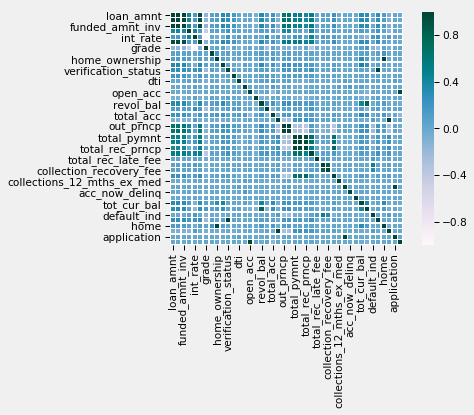

In [128]:
sns.heatmap(Credit_DS.assign(grade=Credit_DS.grade.astype('category').cat.codes, 
                         term=Credit_DS.term.astype('category').cat.codes, 
                         verification=Credit_DS.verification_status.astype('category').cat.codes, 
                         emp_length=Credit_DS.emp_length.astype('category').cat.codes, 
                          home=Credit_DS.home_ownership.astype('category').cat.codes, 
                         purpose=Credit_DS.purpose.astype('category').cat.codes,
                            list_status=Credit_DS.initial_list_status.astype('category').cat.codes,
                            application=Credit_DS.application_type.astype('category').cat.codes,
                            openacc=Credit_DS.open_acc.astype('category').cat.codes).corr(),
             annot=False, cmap='PuBuGn', vmin=-1, vmax=1, square=True, linewidths=0.5)
#plt.show()

# Split Train and Test data with issue_d date.

In [55]:
Credit_DS.issue_d=pd.to_datetime(Credit_DS.issue_d,infer_datetime_format=True)
col_name='issue_d'
print(Credit_DS[col_name].dtype)

datetime64[ns]


In [56]:
split_data="2015-06-01"
Training=Credit_DS[Credit_DS['issue_d']<split_data]
Training.shape

(598978, 38)

In [57]:
Testing=Credit_DS.loc[Credit_DS['issue_d']>='2015-06-01',:]
Testing.shape

(256991, 38)

In [59]:
Training=Training.drop(['issue_d'],axis=1)
Testing=Testing.drop(['issue_d'],axis=1)

KeyError: "['issue_d'] not found in axis"

In [60]:
X_train = Training.values[:,:-1]
Y_train = Training.values[:,-1]

In [61]:
X_test = Testing.values[:,:-1]
Y_test = Testing.values[:,-1]

# Scaling The Data

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)
print(X_test)

[[-1.14444640e+00 -1.14341202e+00 -1.13988120e+00 ...  1.22446777e-03
   4.79105551e-03  2.72648272e-02]
 [-1.44433354e+00 -1.44362136e+00 -1.43672608e+00 ...  1.22446777e-03
   4.79105551e-03  2.72648272e-02]
 [-1.45632902e+00 -1.45562974e+00 -1.44871981e+00 ...  1.22446777e-03
   4.79105551e-03  2.72648272e-02]
 ...
 [-1.84807551e-01 -1.82742115e-01 -1.77384177e-01 ... -1.76378776e-02
  -7.29853126e-01 -3.85913557e-01]
 [-3.04762407e-01 -3.02825853e-01 -2.97321501e-01 ... -1.76378776e-02
  -5.61200123e-01 -1.23366454e-01]
 [ 6.54876440e-01  6.57844050e-01  6.62177089e-01 ... -1.76378776e-02
  -7.35913223e-01  3.05460480e-01]]
[[ 1.25465072  1.25826274  1.26186371 ... -0.01763788  2.03008646
   0.4163137 ]
 [ 0.41496673  0.41767657  0.42230244 ... -0.01261713 -0.71545778
   0.0954228 ]
 [-0.90453669 -0.90324454 -0.89700812 ... -0.01763788 -0.58343672
   0.34921833]
 ...
 [ 1.25465072  1.25826274  1.26186371 ... -0.01763788  2.21050482
   0.53591849]
 [ 1.25465072  1.25826274  1.261863

In [63]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

# Logistic Regression MODEL BUILDING

In [64]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [65]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 2.17493176e+00  1.38620321e+01  9.19229856e+00  1.16776380e-01
   1.10154297e+00  1.14982128e+00  5.96673189e-01  2.84121707e-02
  -8.47874498e-02 -1.13756355e-01 -5.75222289e-02 -4.93696376e-02
  -4.78896509e-03 -3.10269478e-02 -4.66993186e-02 -9.40237162e-02
  -7.06279119e-02 -1.75248375e-02  3.69442189e-02  2.28298089e-01
  -1.14244187e+01 -1.13331845e+01 -6.36379793e+00 -7.51858035e+00
  -1.00731504e+01  3.38741019e+00  1.95857252e-01  2.14780391e+01
   6.74274310e+00 -1.49043250e+01 -3.58587715e-02  0.00000000e+00
  -6.03376045e-02 -6.29534876e-01  6.33526057e-02  4.99645617e-02]]
[-6.15456559]


# Model Evaluation

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)
print("Classification Report :")
print(classification_report(Y_test, Y_pred))
acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256633     47]
 [    63    248]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.84      0.80      0.82       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.92      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9995719694464008


(0.0, 2.0, 2.0, 0.0)

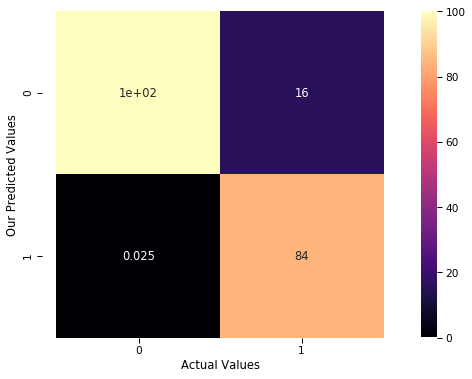

In [68]:
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_pred)
cm = (cm.astype('float')/cm.sum(axis=0))*100
ax=sns.heatmap(cm,annot=True,cmap='magma');
ax.set_xlabel("Actual Values")
ax.set_ylabel("Our Predicted Values")
ax.axis('equal')

In [69]:
y_pred_prob= classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.99818727 0.00181273]
 [0.98560182 0.01439818]
 [0.99169081 0.00830919]
 ...
 [0.99619396 0.00380604]
 [0.99887    0.00113   ]
 [0.9987773  0.0012227 ]]


In [70]:
##TO FIND WHICH THRESHOLD IS BETTER
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])


Errors at threshold  0.0 : 256680  , type 2 error : 0  , type 1 error: 256680
Errors at threshold  0.01 : 42176  , type 2 error : 37  , type 1 error: 42139
Errors at threshold  0.02 : 8898  , type 2 error : 54  , type 1 error: 8844
Errors at threshold  0.03 : 3796  , type 2 error : 60  , type 1 error: 3736
Errors at threshold  0.04 : 2278  , type 2 error : 61  , type 1 error: 2217
Errors at threshold  0.05 : 1533  , type 2 error : 62  , type 1 error: 1471
Errors at threshold  0.06 : 1070  , type 2 error : 62  , type 1 error: 1008
Errors at threshold  0.07 : 819  , type 2 error : 62  , type 1 error: 757
Errors at threshold  0.08 : 641  , type 2 error : 62  , type 1 error: 579
Errors at threshold  0.09 : 519  , type 2 error : 62  , type 1 error: 457
Errors at threshold  0.1 : 449  , type 2 error : 63  , type 1 error: 386
Errors at threshold  0.11 : 382  , type 2 error : 63  , type 1 error: 319
Errors at threshold  0.12 : 351  , type 2 error : 63  , type 1 error: 288
Errors at threshold  

In [71]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Y_test , y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.9444111100588418
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.79180302e-06 7.79180302e-06 1.94795076e-05
 1.94795076e-05 3.11672121e-05 3.11672121e-05 4.28549166e-05
 4.28549166e-05 5.06467197e-05 5.06467197e-05 5.84385227e-05
 5.84385227e-05 7.79180302e-05 7.79180302e-05 8.57098333e-05
 8.57098333e-05 8.96057348e-05 8.96057348e-05 9.35016363e-05
 9.35016363e-05 1.09085242e-04 1.09085242e-04 1.12981144e-04
 1.12981144e-04 1.51940159e-04 1.51940159e-04 1.62848683e-03
 1.62848683e-03 7.50740221e-03 7.50740221e-03 1.12981144e-02
 1.12981144e-02 1.80575035e-02 1.80575035e-02 2.55493221e-02
 2.55493221e-02 2.71622253e-02 2.71622253e-02 3.03724482e-02
 3.03724482e-02 3.19424965e-02 3.19424965e-02 3.28346579e-02
 3.28346579e-02 4.00459716e-02 4.00459716e-02 4.00693470e-02
 4.00693470e-02 5.35452704e-02 5.35452704e-02 6.18863955e-02
 6.18863955e-02 6.41577061e-02 6.41577061e-02 7.50779180e-02
 7.50779180e-02 7.95036621e-02 7.95036621e-02 9.39107059e-02
 9.39

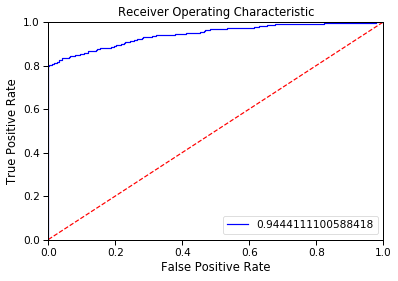

In [72]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [73]:
##K - FOLD METHOD FOR CROSS VALIDATION
#Using cross validation
classifier=(LogisticRegression())
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)


KFold(n_splits=10, random_state=None, shuffle=False)


In [74]:
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                    y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())
#Gives multiple accuracies and finally gives mean of all accuracies
#82.40% is approx close to 85% , hence we go ahead with base model
#if we want to go ahead with kfold model then execute the next block
#%%
for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
#%%
Y_pred=classifier.predict(X_test)

D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.99143544 0.99791312 0.99626031 0.99390631 0.99721193 0.99652743
 0.99669438 0.99742896 0.99771274 0.99727866]
0.9962369277628668


D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification report: ")
#recall gives accuracy for individual value(sensitivity for 0(TNR),specificity for 1(TPR))
#precision gives precision of class 0 and class 1 (how many predictions were correct?)
print(classification_report(Y_test, Y_pred))

acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256631     49]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.84      0.80      0.82       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.92      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.999564187072699


# Decision Tree Model

In [76]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(random_state=10,min_samples_leaf=100,max_depth=25,criterion='gini')
#default criterion is gini
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [77]:
Y_pred = model_DT.predict(X_test)
#print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

# Evaluation of Model

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test, Y_pred))

acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256676      4]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.98      0.80      0.88       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.99      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9997392904809896


(0.0, 2.0, 2.0, 0.0)

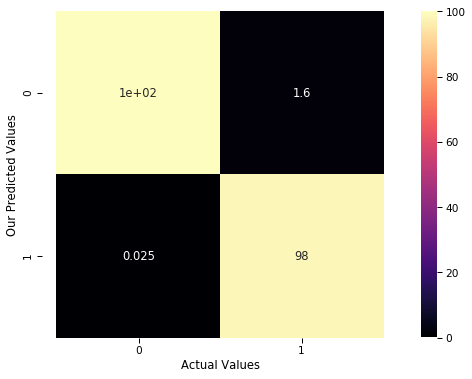

In [79]:
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_pred)
cm = (cm.astype('float')/cm.sum(axis=0))*100
ax=sns.heatmap(cm,annot=True,cmap='magma');
ax.set_xlabel("Actual Values")
ax.set_ylabel("Our Predicted Values")
ax.axis('equal')

In [80]:
colname=Training.columns[:]
colname

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

In [81]:
from sklearn import tree

with open("model_DecisionTree.txt","w") as f:
    f = tree.export_graphviz(model_DT,feature_names=colname[:-1],out_file=f)

In [82]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Y_test , Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.8987060345635363
[0.0000000e+00 1.5583606e-05 1.0000000e+00]
[0.         0.79742765 1.        ]


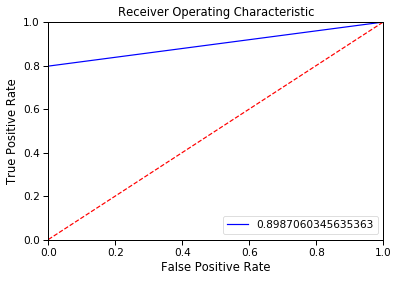

In [83]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# ENSEMBLE MODEL

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [86]:
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(kernel='rbf',gamma=0.1,C=70.0)
estimators.append(('svm', model3))
print(estimators)

[('log', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('cart', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('svm', SVC(C=70.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


In [ ]:
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)

D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Gradient Boosting Classifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier()
#model_GradientBoosting=DecisionTreeClassifier()

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

#checking result
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion_matrix
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
#classification_report
print("Classification report: ")
print(classification_report(Y_test,Y_pred))
#accuracy_score
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[141227 115453]
 [     6    305]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    256680
           1       0.00      0.98      0.01       311

   micro avg       0.55      0.55      0.55    256991
   macro avg       0.50      0.77      0.36    256991
weighted avg       1.00      0.55      0.71    256991

Accuracy of the model:  0.550727457381776


(0.0, 2.0, 2.0, 0.0)

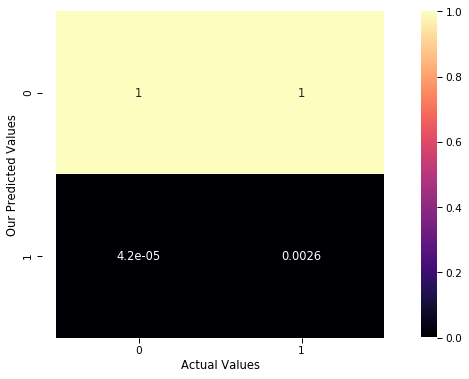

In [85]:
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_pred)
cm = cm.astype('float')/cm.sum(axis=0)
ax=sns.heatmap(cm,annot=True,cmap='magma');
ax.set_xlabel("Actual Values")
ax.set_ylabel("Our Predicted Values")
ax.axis('equal')

In [86]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Y_test , Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7654569391392537
[0.         0.44979352 1.        ]
[0.        0.9807074 1.       ]


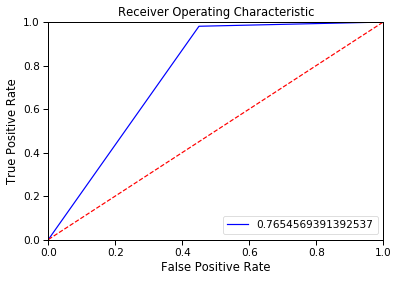

In [87]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# ADA Booster Classifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()
ada_model.fit(X_train,Y_train)
Y_pred=ada_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[248532   8148]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    256680
           1       0.03      0.80      0.06       311

   micro avg       0.97      0.97      0.97    256991
   macro avg       0.51      0.88      0.52    256991
weighted avg       1.00      0.97      0.98    256991

Accuracy of the model:  0.9680494647672486


(0.0, 2.0, 2.0, 0.0)

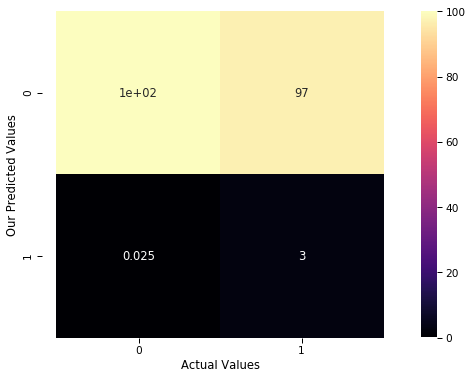

In [89]:
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_pred)
cm = (cm.astype('float')/cm.sum(axis=0))*100
ax=sns.heatmap(cm,annot=True,cmap='magma');
ax.set_xlabel("Actual Values")
ax.set_ylabel("Our Predicted Values")
ax.axis('equal')

In [90]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Y_test , Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.8828419236082613
[0.         0.03174381 1.        ]
[0.         0.79742765 1.        ]


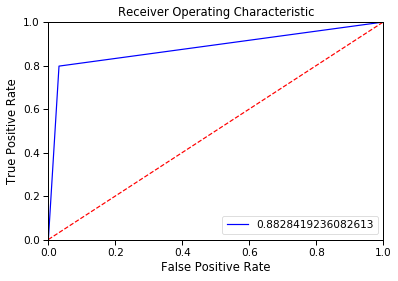

In [91]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# Extra Tree Classifier

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
model=(ExtraTreesClassifier(4,random_state=100))
model=model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[204845  51835]
 [    36    275]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    256680
           1       0.01      0.88      0.01       311

   micro avg       0.80      0.80      0.80    256991
   macro avg       0.50      0.84      0.45    256991
weighted avg       1.00      0.80      0.89    256991

Accuracy of the model:  0.7981602468568938


(0.0, 2.0, 2.0, 0.0)

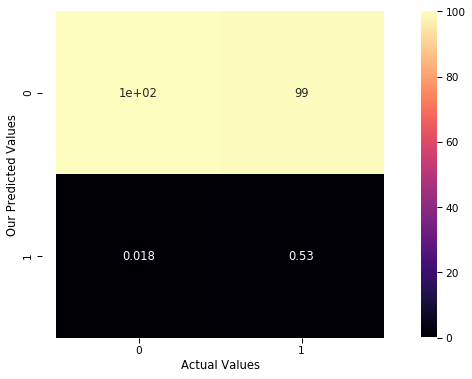

In [93]:
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_pred)
cm = (cm.astype('float')/cm.sum(axis=0))*100
ax=sns.heatmap(cm,annot=True,cmap='magma');
ax.set_xlabel("Actual Values")
ax.set_ylabel("Our Predicted Values")
ax.axis('equal')

In [94]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Y_test , Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.8411501590680304
[0.         0.20194405 1.        ]
[0.         0.88424437 1.        ]


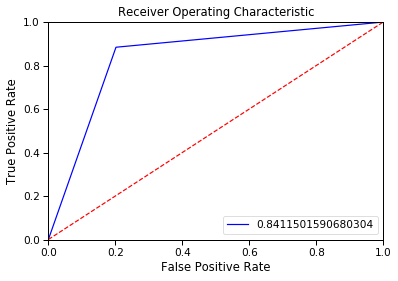

In [95]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
AdaBoostClassifier ExtraTreesClassifier model_DT classifier

In [130]:
from sklearn.ensemble import VotingClassifier
from statistics import mode
voting_pred = np.array([])
for i in range(0,len(X_test)):
    voting_pred = np.append(voting_pred, mode([AdaBoostClassifier[i],ExtraTreesClassifier[i],model_DT[i],classifier[i]]))


TypeError: 'ABCMeta' object is not subscriptable